In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('reviews.csv')

In [5]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
#want only two columns
df[['date', 'reviewer_id']][2:]

,date,reviewer_id
2,2015-07-26,37722850
3,2015-08-02,33671805
4,2015-08-10,34959538
5,2015-08-23,1154501
6,2015-09-01,37853266
...,...,...
84844,2015-10-12,37419458
84845,2015-10-17,6933252
84846,2015-10-20,19543701
84847,2015-11-02,24445024


In [12]:
df.shape

(84849, 6)

In [13]:
df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [14]:
df2 = df.dropna()

In [15]:
df2.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [1]:
df3 = pd.read_csv('listings.csv')

NameError: name 'pd' is not defined

In [18]:
df3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,23,2022-12-08,0.17,8,0,3,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97641,-80.12052,Entire home/apt,150,30,3,2022-08-15,0.05,2,276,1,NaN
2,191160,Tropical Beach Paradise Awaits You,924482,Dan,NaN,Deerfield Beach,26.30707,-80.07793,Entire home/apt,119,2,25,2019-11-08,0.19,1,87,0,NaN
3,129099,MIAMI - AMAZING APARTMENT OCEANVIEW,637272,Bianca,NaN,Hollywood,25.99416,-80.11969,Entire home/apt,225,28,27,2022-07-01,0.20,6,338,2,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.99332,-80.11887,Entire home/apt,261,28,21,2022-03-27,0.15,6,336,2,NaN


In [19]:
#get the average price of the listings
df3['price'].mean()

392.03823279524215

In [20]:
#get the average number of review for each neighbourhood
df3.groupby('neighbourhood')['number_of_reviews'].mean()



neighbourhood
Coconut Creek               17.220339
Cooper City                 30.103448
Coral Springs               11.060241
County Regional Facility    22.333333
Dania Beach                 27.003591
Davie                       23.863905
Deerfield Beach             26.771233
Fort Lauderdale             34.773091
Hallandale Beach            17.017891
Hillsboro Beach             11.419355
Hollywood                   25.189170
Lauderdale By The Sea       29.626741
Lauderdale Lakes            23.886792
Lauderhill                  13.490909
Lazy Lake                   20.166667
Lighthouse Point            17.010101
Margate                     15.895833
Miramar                     23.860714
North Lauderdale            15.000000
Oakland Park                29.539526
Parkland                    23.222222
Pembroke Park               10.823529
Pembroke Pines              24.893333
Plantation                  20.458763
Pompano Beach               20.504325
Sea Ranch Lakes             45.22222

<AxesSubplot:>

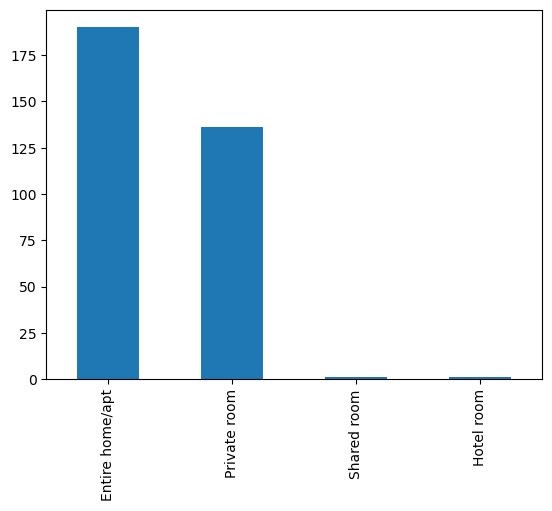

In [21]:
#get the room type for each neighbourhood and plot it
df3.groupby('neighbourhood')['room_type'].head(10).value_counts().plot(kind='bar')


In [24]:
#test the correlation between the price and the number of reviews
df3['price'].corr(df3['number_of_reviews'])


-0.05298536672469762

In [25]:
df4 = pd.read_csv('neighbourhoods.csv')

In [27]:
df4.head()

,neighbourhood_group,neighbourhood
0,NaN,Coconut Creek
1,NaN,Cooper City
2,NaN,Coral Springs
3,NaN,County Regional Facility
4,NaN,Dania Beach
